In [18]:
!pip install scikit-learn gensim wordcloud
!pip install Medmnist v2
!pip install pillow
!pip install --upgrade medmnist

MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/
Dataset DermaMNIST of size 28 (dermamnist)
    Number of datapoints: 7007
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0
7007
Class 0: ac

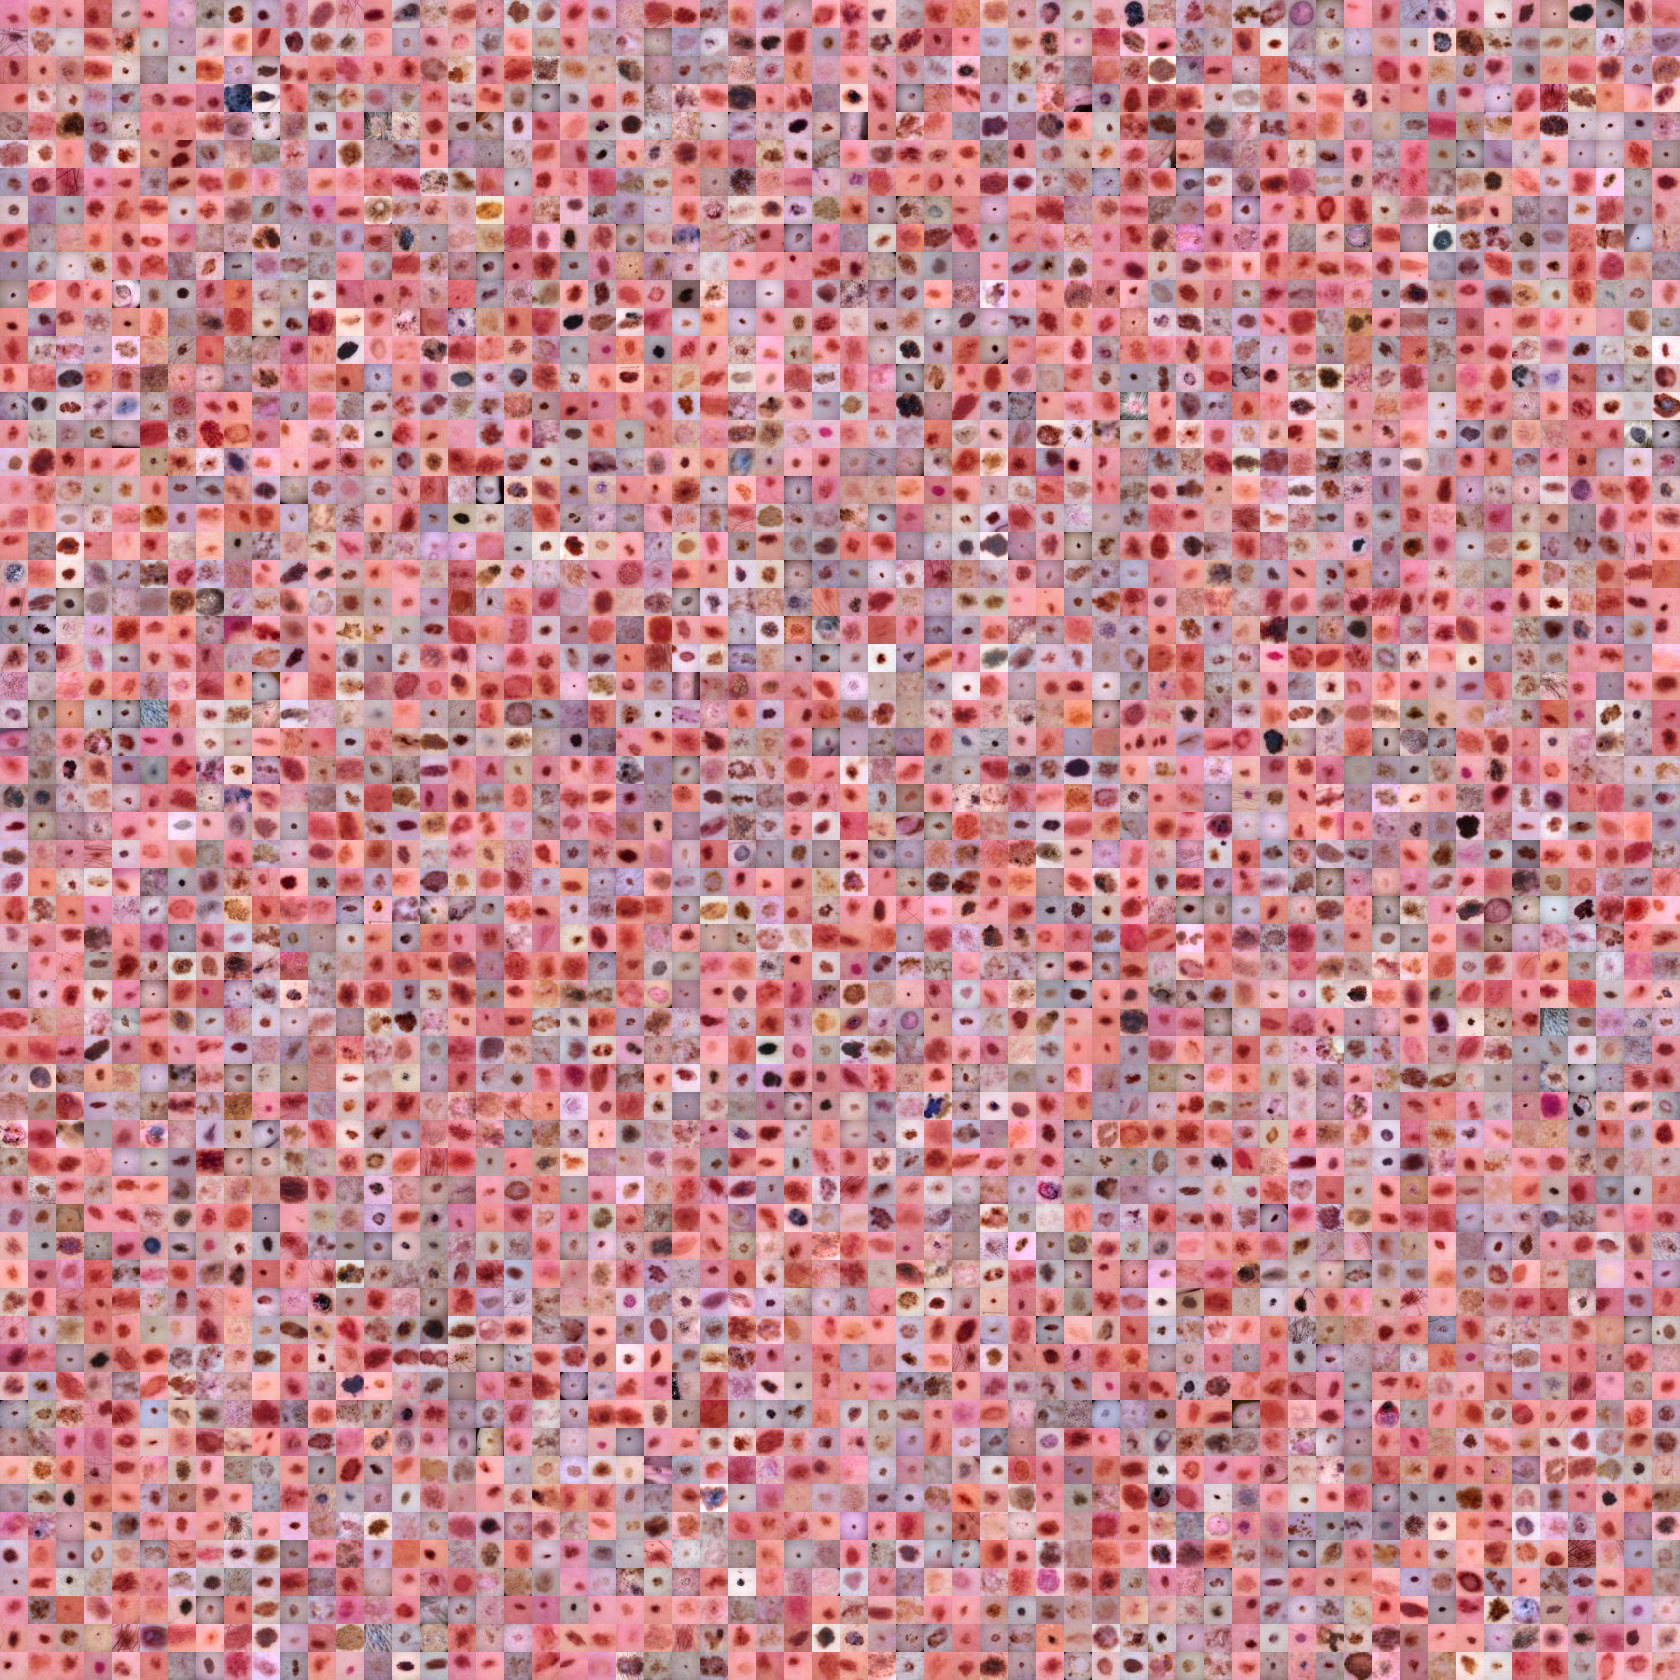

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tqdm import tqdm
import medmnist
from medmnist import INFO, Evaluator
from medmnist import DermaMNIST
import os

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

# load the data
train_dataset = DermaMNIST(split='train', download=True)
print(train_dataset)

print(len(train_dataset))

class_labels = {
    '0': 'actinic keratoses and intraepithelial carcinoma',
    '1': 'basal cell carcinoma',
    '2': 'benign keratosis-like lesions',
    '3': 'dermatofibroma',
    '4': 'melanoma',
    '5': 'melanocytic nevi',
    '6': 'vascular lesions'
}

# Print class labels
for label, meaning in class_labels.items():
    print(f"Class {label}: {meaning}")

def montage(self, length=20, replace=False, save_folder=None):
    from medmnist.utils import montage2D
    # Create save folder if specified
    if save_folder is not None and not os.path.exists(save_folder):
        os.makedirs(save_folder)

    # Iterate over each class in the dataset
    montage_images = {}
    for class_label in range(self.info['n_classes']):
        # Select random samples from the current class
        n_sel = length * length
        sel = np.random.choice(np.where(self.labels == class_label)[0], size=n_sel, replace=replace)

        # Generate montage image for the selected samples
        montage_img = montage2D(imgs=self.imgs,
                                n_channels=self.info['n_channel'],
                                sel=sel)

        # Save montage image if save_folder is specified
        if save_folder is not None:
            montage_img.save(os.path.join(save_folder, f"{self.flag}_{self.split}_montage_class_{class_label}.jpg"))

        # Store montage image in the dictionary with class label as key
        montage_images[class_label] = montage_img

    return montage_images

train_dataset.montage(length=20)
train_dataset.montage(length=60)


MedMNIST v3.0.2 @ https://github.com/MedMNIST/MedMNIST/
Dataset DermaMNIST of size 28 (dermamnist)
    Number of datapoints: 7007
    Root location: /root/.medmnist
    Split: train
    Task: multi-class
    Number of channels: 3
    Meaning of labels: {'0': 'actinic keratoses and intraepithelial carcinoma', '1': 'basal cell carcinoma', '2': 'benign keratosis-like lesions', '3': 'dermatofibroma', '4': 'melanoma', '5': 'melanocytic nevi', '6': 'vascular lesions'}
    Number of samples: {'train': 7007, 'val': 1003, 'test': 2005}
    Description: The DermaMNIST is based on the HAM10000, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. The dataset consists of 10,015 dermatoscopic images categorized as 7 different diseases, formulized as a multi-class classification task. We split the images into training, validation and test set with a ratio of 7:1:2. The source images of 3×600×450 are resized into 3×28×28.
    License: CC BY-NC 4.0
7007
Class 0: ac

100%|██████████| 110/110 [00:01<00:00, 73.07it/s]


Epoch [1/10], Loss: 127.3967, Accuracy: 0.6632


100%|██████████| 110/110 [00:01<00:00, 75.44it/s]


Epoch [2/10], Loss: 120.5390, Accuracy: 0.6698


100%|██████████| 110/110 [00:01<00:00, 76.51it/s]


Epoch [3/10], Loss: 118.0018, Accuracy: 0.6695


100%|██████████| 110/110 [00:01<00:00, 75.57it/s]


Epoch [4/10], Loss: 116.7321, Accuracy: 0.6692


100%|██████████| 110/110 [00:02<00:00, 53.89it/s]


Epoch [5/10], Loss: 115.7229, Accuracy: 0.6693


100%|██████████| 110/110 [00:01<00:00, 61.65it/s]


Epoch [6/10], Loss: 114.8430, Accuracy: 0.6692


100%|██████████| 110/110 [00:01<00:00, 76.48it/s]


Epoch [7/10], Loss: 114.2902, Accuracy: 0.6699


100%|██████████| 110/110 [00:01<00:00, 76.21it/s]


Epoch [8/10], Loss: 114.2735, Accuracy: 0.6690


100%|██████████| 110/110 [00:01<00:00, 76.52it/s]


Epoch [9/10], Loss: 113.6873, Accuracy: 0.6698


100%|██████████| 110/110 [00:01<00:00, 75.72it/s]


Epoch [10/10], Loss: 113.9888, Accuracy: 0.6693

Starting CNN Training...


100%|██████████| 110/110 [00:05<00:00, 21.22it/s]


Epoch [1/10], Loss: 137.6065, Accuracy: 0.6448


100%|██████████| 110/110 [00:04<00:00, 23.02it/s]


Epoch [2/10], Loss: 113.3698, Accuracy: 0.6705


100%|██████████| 110/110 [00:04<00:00, 24.25it/s]


Epoch [3/10], Loss: 111.1739, Accuracy: 0.6716


100%|██████████| 110/110 [00:05<00:00, 20.36it/s]


Epoch [4/10], Loss: 107.7038, Accuracy: 0.6738


100%|██████████| 110/110 [00:04<00:00, 24.40it/s]


Epoch [5/10], Loss: 106.3221, Accuracy: 0.6758


100%|██████████| 110/110 [00:04<00:00, 24.37it/s]


Epoch [6/10], Loss: 105.5421, Accuracy: 0.6772


100%|██████████| 110/110 [00:05<00:00, 20.26it/s]


Epoch [7/10], Loss: 104.3713, Accuracy: 0.6785


100%|██████████| 110/110 [00:04<00:00, 24.46it/s]


Epoch [8/10], Loss: 104.6944, Accuracy: 0.6789


100%|██████████| 110/110 [00:05<00:00, 20.75it/s]


Epoch [9/10], Loss: 103.3245, Accuracy: 0.6800


100%|██████████| 110/110 [00:04<00:00, 23.51it/s]
/tmp/ipython-input-352646344.py:181: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  label = int(label)  # <-- Fix here


Epoch [10/10], Loss: 102.3732, Accuracy: 0.6859


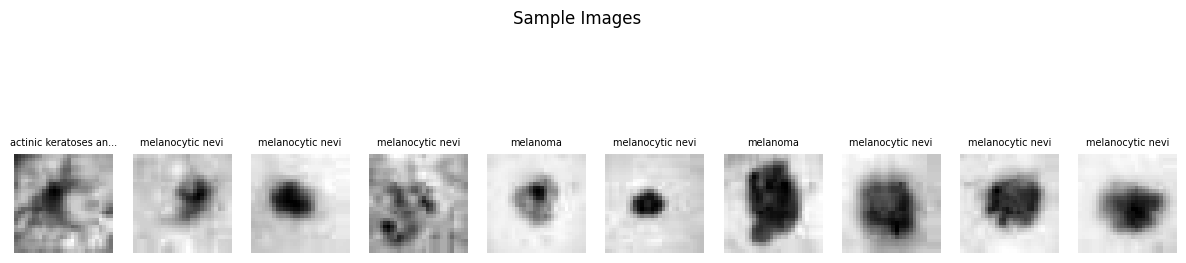

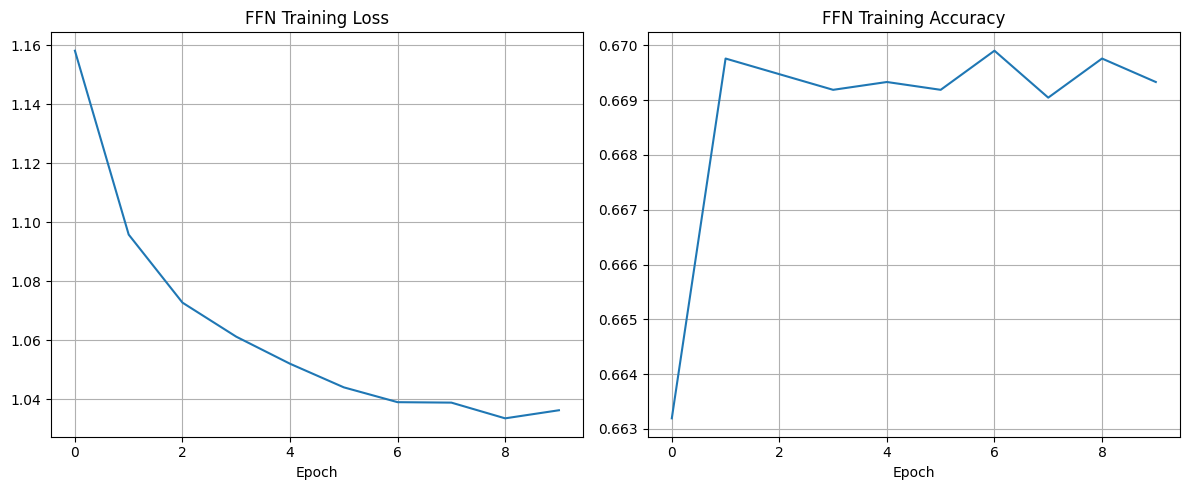

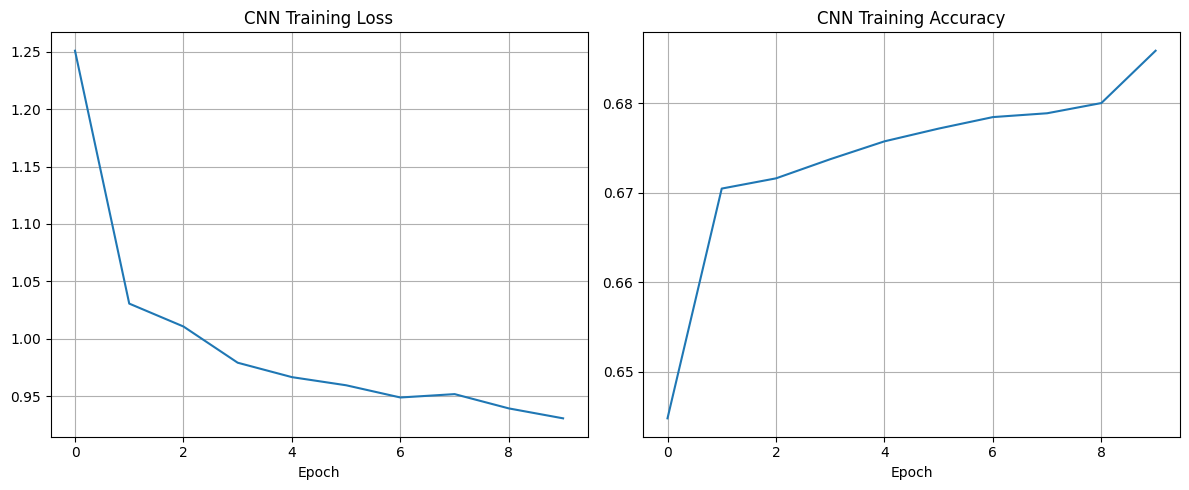

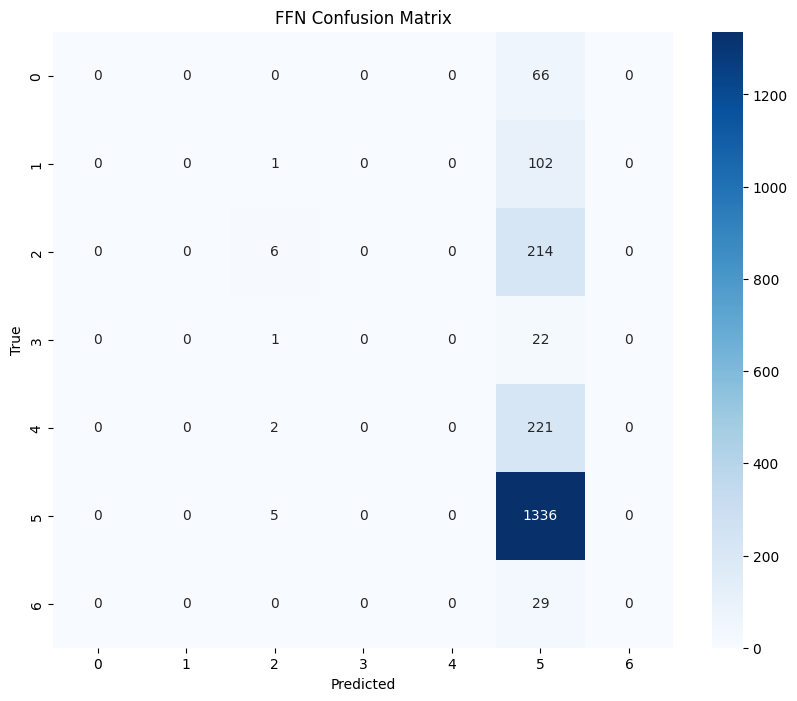

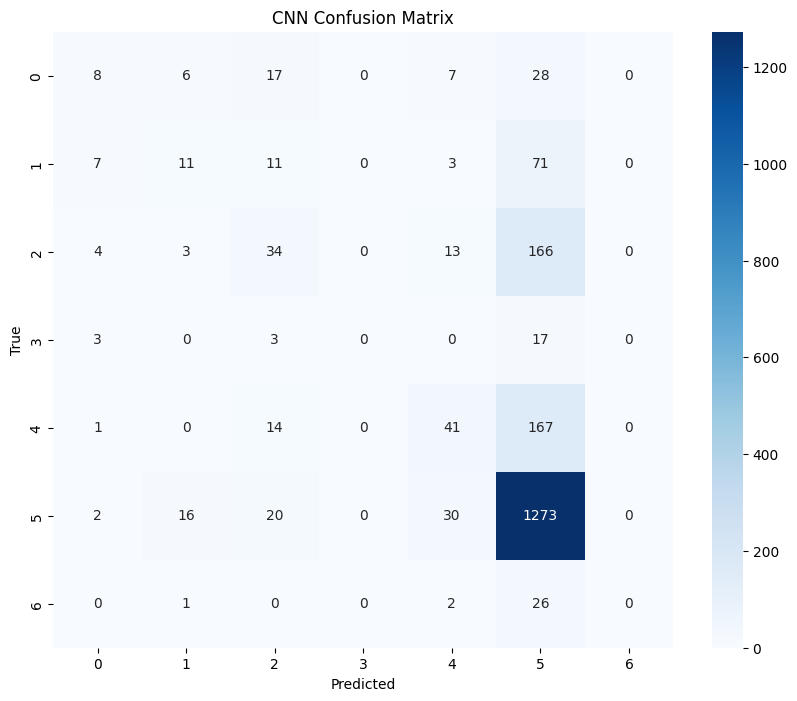

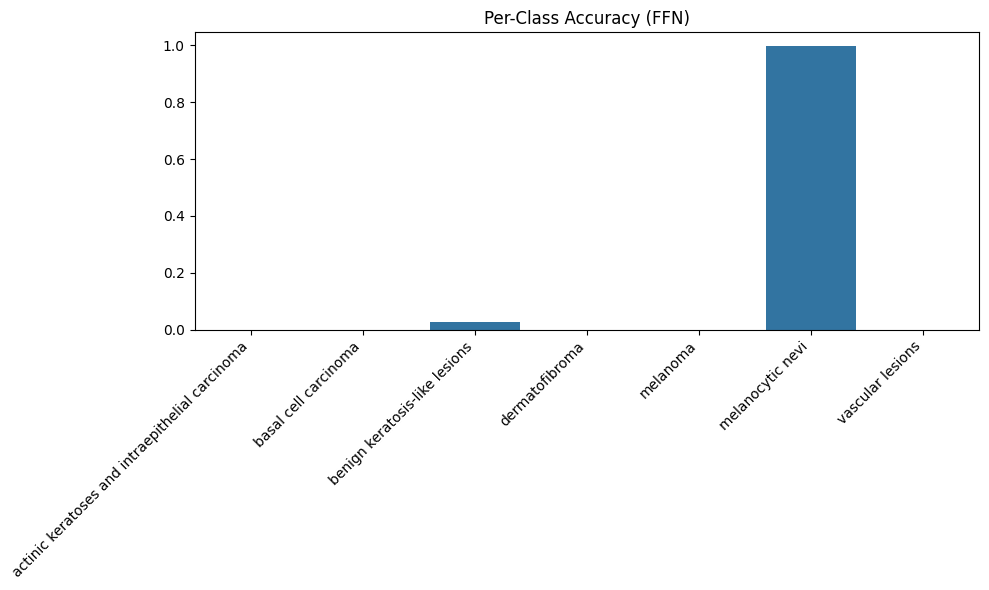

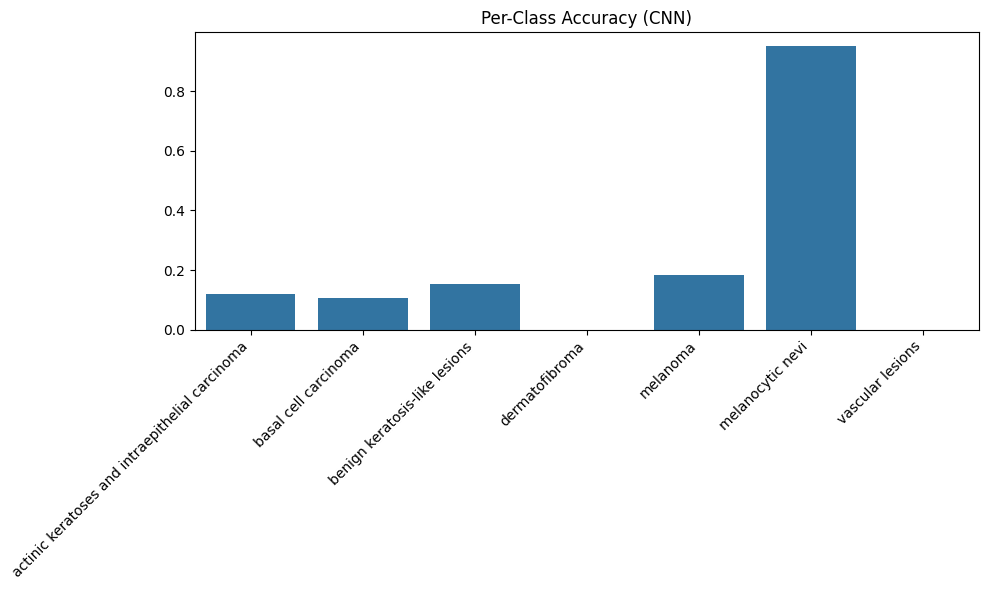

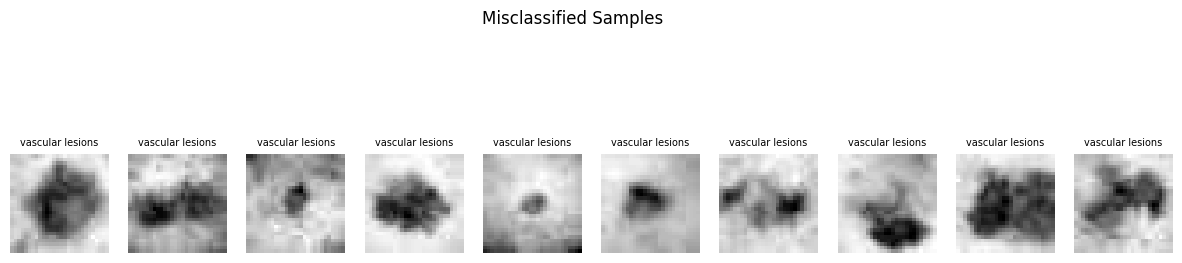

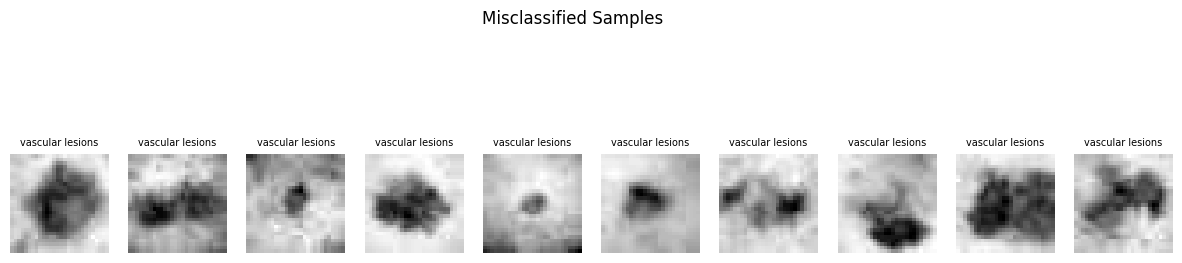

In [25]:
# ==============================================================================
# Imports and Setup
# ==============================================================================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
from PIL import Image
from sklearn.metrics import confusion_matrix
import seaborn as sns
import medmnist
from medmnist import DermaMNIST

print(f"MedMNIST v{medmnist.__version__} @ {medmnist.HOMEPAGE}")

# ==============================================================================
# Load Dataset and Labels
# ==============================================================================
train_dataset = DermaMNIST(split='train', download=True)
print(train_dataset)
print(len(train_dataset))

class_labels = {
    '0': 'actinic keratoses and intraepithelial carcinoma',
    '1': 'basal cell carcinoma',
    '2': 'benign keratosis-like lesions',
    '3': 'dermatofibroma',
    '4': 'melanoma',
    '5': 'melanocytic nevi',
    '6': 'vascular lesions'
}

# Print class labels
for label, meaning in class_labels.items():
    print(f"Class {label}: {meaning}")

# ==============================================================================
# Transform and DataLoaders
# ==============================================================================
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_dataset = DermaMNIST(split='train', download=True, transform=transform)
test_dataset = DermaMNIST(split='test', download=True, transform=transform)

train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# ==============================================================================
# FFN Model Definition and Training
# ==============================================================================
class FFNModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, hidden_dim)
        self.sigmoid = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.sigmoid(x)
        x = self.fc2(x)
        return x

input_dim_ffn = 28 * 28
hidden_dim_ffn = 256
output_dim_ffn = 7
model_ffn = FFNModel(input_dim_ffn, hidden_dim_ffn, output_dim_ffn)
criterion_ffn = nn.CrossEntropyLoss()
optimizer_ffn = torch.optim.Adam(model_ffn.parameters(), lr=0.001)

num_epochs = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model_ffn.to(device)

history_ffn = {'train_acc': [], 'train_loss': []}

print("Starting FFN Training...")
for epoch in range(num_epochs):
    correct, total, epoch_loss = 0, 0, 0
    for X, y in tqdm(train_dataloader):
        X, y = X.to(device), y.to(device)
        outputs = model_ffn(X)
        y = y.view(-1)
        loss = criterion_ffn(outputs, y)

        optimizer_ffn.zero_grad()
        loss.backward()
        optimizer_ffn.step()

        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
        epoch_loss += loss.item()

    history_ffn['train_acc'].append(correct / total)
    history_ffn['train_loss'].append(epoch_loss / len(train_dataloader))
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {correct / total:.4f}')

# ==============================================================================
# CNN Model Definition and Training
# ==============================================================================
class CNNModel(nn.Module):
    def __init__(self, input_dim, num_filters, kernel_size, output_dim):
        super(CNNModel, self).__init__()
        self.conv1 = nn.Conv2d(input_dim, num_filters, kernel_size)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(num_filters * ((28 - kernel_size + 1) // 2) ** 2, 128)
        self.fc2 = nn.Linear(128, output_dim)

    def forward(self, x):
        x = self.pool(self.conv1(x))
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

model_cnn = CNNModel(1, 32, 3, 7)
model_cnn.to(device)
criterion_cnn = nn.CrossEntropyLoss()
optimizer_cnn = torch.optim.Adam(model_cnn.parameters(), lr=0.001)
history_cnn = {'train_acc': [], 'train_loss': []}

print("\nStarting CNN Training...")
for epoch in range(num_epochs):
    correct, total, epoch_loss = 0, 0, 0
    for X, y in tqdm(train_dataloader):
        X, y = X.to(device), y.to(device)
        outputs = model_cnn(X)
        y = y.view(-1)
        loss = criterion_cnn(outputs, y)

        optimizer_cnn.zero_grad()
        loss.backward()
        optimizer_cnn.step()

        _, predicted = torch.max(outputs.data, 1)
        total += y.size(0)
        correct += (predicted == y).sum().item()
        epoch_loss += loss.item()

    history_cnn['train_acc'].append(correct / total)
    history_cnn['train_loss'].append(epoch_loss / len(train_dataloader))
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {correct / total:.4f}')

# ==============================================================================
# Evaluation and Visualization Helpers
# ==============================================================================
def evaluate_and_plot(model, dataloader, model_type):
    y_true, y_pred = [], []
    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, predicted = torch.max(outputs, 1)
            y_true.extend(y.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{model_type.upper()} Confusion Matrix')
    plt.show()

def visualize_samples(dataset, num_images=10):
    plt.figure(figsize=(15, 4))
    for i in range(num_images):
        image, label = dataset[i]
        image = image.squeeze()
        label = int(label)  # <-- Fix here
        plt.subplot(1, num_images, i+1)
        plt.imshow(image, cmap='gray')
        label_text = class_labels[str(label)]
        short_label = label_text[:20] + '...' if len(label_text) > 20 else label_text
        plt.title(short_label, fontsize=7)
        plt.axis('off')
    plt.suptitle("Sample Images", fontsize=12)
    plt.show()


def plot_training_history(history, model_type):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history['train_loss'], label='Loss')
    plt.title(f'{model_type.upper()} Training Loss')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(history['train_acc'], label='Accuracy')
    plt.title(f'{model_type.upper()} Training Accuracy')
    plt.xlabel('Epoch')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def per_class_accuracy(model, dataloader, model_type):
    correct = np.zeros(output_dim_ffn)
    total = np.zeros(output_dim_ffn)
    with torch.no_grad():
        model.eval()
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, predicted = torch.max(outputs, 1)
            for i in range(len(y)):
                total[y[i]] += 1
                if predicted[i] == y[i]:
                    correct[y[i]] += 1
    acc = correct / total
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[class_labels[str(i)] for i in range(output_dim_ffn)], y=acc)
    plt.title(f"Per-Class Accuracy ({model_type.upper()})")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

def visualize_misclassifications(model, dataloader, num_samples=10):
    images, true_labels, pred_labels = [], [], []
    model.eval()
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            outputs = model(X)
            _, preds = torch.max(outputs, 1)
            for img, true, pred in zip(X, y, preds):
                if true != pred:
                    images.append(img.cpu())
                    true_labels.append(true.item())
                    pred_labels.append(pred.item())
                if len(images) >= num_samples:
                    break
            if len(images) >= num_samples:
                break
    plt.figure(figsize=(15, 4))
    for i in range(num_samples):
        img = images[i].squeeze()
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img, cmap='gray')
        label_text = class_labels[str(label)]
        short_label = label_text[:20] + '...' if len(label_text) > 20 else label_text
        plt.title(short_label, fontsize=7)
        plt.axis('off')
    plt.suptitle("Misclassified Samples", fontsize=12)
    plt.show()

# ==============================================================================
# Call Visualizations
# ==============================================================================
visualize_samples(train_dataset)
plot_training_history(history_ffn, 'ffn')
plot_training_history(history_cnn, 'cnn')
evaluate_and_plot(model_ffn, test_dataloader, 'ffn')
evaluate_and_plot(model_cnn, test_dataloader, 'cnn')
per_class_accuracy(model_ffn, test_dataloader, 'ffn')
per_class_accuracy(model_cnn, test_dataloader, 'cnn')
visualize_misclassifications(model_ffn, test_dataloader)
visualize_misclassifications(model_cnn, test_dataloader)
